2018-11-21 14:33:22 

Fitting line to random data with SGD -- code-along of [lesson2-sgd](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-sgd.ipynb)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch

## Linear Regression Problem

random data

In [11]:
# set number of data points
n = 200
# initialize x with 2 dims
x = torch.ones(n,2)
# set x's 1st dim to a random uniform distribution between (-1, 1)
x[:,0].uniform_(-1.,1);

Q: why exactly does `x` need a second dimension of ones? Is it because we're plotting it on 2D? So it would need 3 dims for a 3D plot?

- See DL1v3 [Lesson 2 @ 1:02:56](https://youtu.be/Egp4Zajhzog?t=3776)

Yeah, basically it turns the $y_i = ax_i+b$ equation into a linear algebra eq $y_i = a_1x_{i1}+a_2x_{i2}$. So the bias dimension is encoded as a vector of 1s.

I think this is also the case because if you plot x[:,0] vs x[:,1], all x is on the 1 line -- ie: x is normalized wrt its horizontal position -- so we use that as a reference... *I think*.

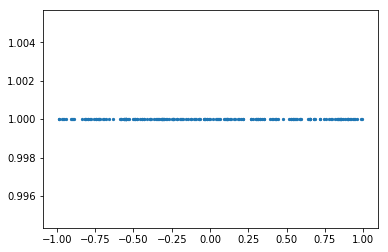

In [42]:
plt.scatter(x[:,0],x[:,1], s=5);

In [17]:
# a will encode a & b as a1,a2
a = torch.tensor((3., 2))

In [27]:
# to get y we do a dot product. we can also add noise
y = x@a + torch.rand(n)

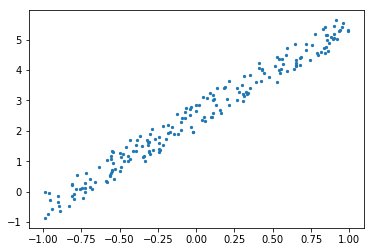

In [28]:
plt.scatter(x[:,0],y, s=5);

You want to find the **parameters** (weights) `a` st you minimize the *error* between the points and the line x@a. Note that here `a` is unknown. For a regression problem the most common *error function* is the **mean squared error**.

In [31]:
def mse(y_hat, y): return ((y_hat - y)**2).mean()

Suppose we believe `a = (-1.0, 1.0)`, then we can compute ŷ which is our *prediction* and then compute the error.

In [32]:
a = torch.tensor((-1.,1))

In [33]:
ŷ = x@a
mse(ŷ, y)

tensor(7.4653)

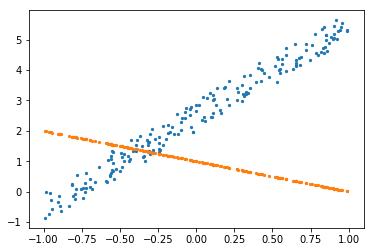

In [37]:
plt.scatter(x[:,0],y, s=5)
plt.scatter(x[:,0],ŷ, s=5);

So far we've specified the model (linear regression) and the *evaluation criteria* (or loss function*). Now we need to handle *optimization*; that is, how do we find the best value for `a`? How do we find the best *fitting* linear regression?

## Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`. Gradient Descent implemented in PyTorch:

In [43]:
a = torch.nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [45]:
def update():
    ŷ = x@a # compute ŷ
    loss = mse(ŷ,y) # calculate error
    if t%10==0: print(loss) # printout
    loss.backward() # backpropagate derivatives
    with torch.no_grad(): # turn off autograd for weight updates
        a.sub_(lr * a.grad) # subtract lr*derivative
        a.grad.zero_() # zero gradients

In [46]:
lr = 1e-1
for t in range(100): update()

tensor(7.4653, grad_fn=<MeanBackward1>)
tensor(1.4725, grad_fn=<MeanBackward1>)
tensor(0.4458, grad_fn=<MeanBackward1>)
tensor(0.1776, grad_fn=<MeanBackward1>)
tensor(0.1059, grad_fn=<MeanBackward1>)
tensor(0.0867, grad_fn=<MeanBackward1>)
tensor(0.0816, grad_fn=<MeanBackward1>)
tensor(0.0802, grad_fn=<MeanBackward1>)
tensor(0.0798, grad_fn=<MeanBackward1>)
tensor(0.0797, grad_fn=<MeanBackward1>)


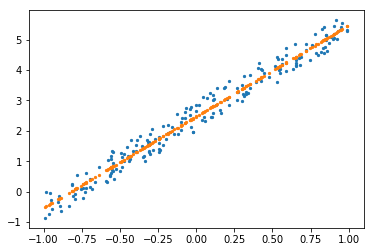

In [55]:
plt.scatter(x[:,0],y, s=5)
plt.scatter(x[:,0],x@a.detach(),s=5);

## Animation:

In [56]:
from matplotlib import animation,rc
rc('animation', html='jshtml')

In [68]:
x@a.detach()

tensor([1.7415, 0.9535, 0.2813, 0.4090, 1.0710, 1.8136, 1.0404, 0.8830, 0.3474,
        1.0986, 1.4127, 1.2418, 1.2454, 1.6367, 0.0591, 1.8881, 0.3210, 0.9006,
        1.5589, 0.7986, 0.5711, 0.4504, 0.9464, 1.2834, 0.6988, 1.3020, 1.3214,
        0.8902, 1.1567, 0.3554, 0.0693, 0.6469, 1.0351, 1.0225, 0.1609, 0.3236,
        0.4614, 1.9891, 0.5925, 1.4739, 0.9603, 1.6956, 1.5896, 0.0506, 1.7261,
        0.4397, 1.3131, 1.5557, 1.0720, 0.8104, 1.3651, 1.3361, 1.2409, 1.9657,
        0.1739, 0.9987, 1.1017, 1.7208, 1.4877, 0.9075, 1.0325, 0.7853, 1.7560,
        1.3555, 1.3109, 1.0642, 0.3480, 1.0935, 1.0393, 0.1420, 0.0855, 1.8103,
        1.9014, 0.4578, 1.1212, 1.9421, 1.5840, 0.6971, 0.1506, 0.9318, 0.6706,
        1.5799, 1.2372, 1.3102, 1.8134, 0.8884, 1.4556, 1.4340, 0.1670, 0.6586,
        0.3466, 1.5571, 1.6941, 1.7948, 0.8874, 1.2695, 1.9046, 1.7440, 0.6927,
        1.6608, 1.4894, 0.8609, 1.6799, 1.4757, 1.3396, 0.3156, 0.6858, 1.0212,
        0.5560, 0.4828, 1.0043, 0.9822, 

In [84]:
a = torch.nn.Parameter(torch.tensor((-1.,1)))

fig = plt.figure()
plt.scatter(x[:,0], y, c='red',s=5)
line, = plt.plot(x[:,0].numpy(), (x@a).detach().numpy())
plt.close()                 # or: (x@a.detach()).numpy()                 #
                            # looks like fastai handles the detach thing #
def animate(i):             # automatically, which is nice               #
    update()
    line.set_ydata(x@a.detach())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)

## using fastai:

Looks like some `.detach()` and `.numpy()` things *are* handled automatically when `fastai` is imported.

In [85]:
from fastai import *

In [86]:
a = torch.nn.Parameter(torch.tensor((-1.,1)))

fig = plt.figure()
plt.scatter(x[:,0], y, c='red',s=5)
line, = plt.plot(x[:,0], x@a)
plt.close()                 # or: (x@a.detach()).numpy()                 #
                            # looks like fastai handles the detach thing #
def animate(i):             # automatically, which is nice               #
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0,100), interval=20)

checking fastai vs pytorch

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch

In [4]:
from fastai import *

In [5]:
n = 200
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
a = tensor(3.,2)
# a = torch.tensor([3.,2])
y = x@a + torch.rand(n)
def mse(y_hat, y): return ((y_hat-y)**2).mean()
a = nn.Parameter(a); a
# a = torch.nn.Parameter(a); a
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()
lr = 1e-1
for t in range(100): update()
    
from matplotlib import animation, rc
rc('animation', html='jshtml')

a = nn.Parameter(tensor(-1.,1))
# a = torch.nn.Parameter(torch.tensor([3.,2]))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)


tensor(0.3713, grad_fn=<MeanBackward1>)
tensor(0.0868, grad_fn=<MeanBackward1>)
tensor(0.0835, grad_fn=<MeanBackward1>)
tensor(0.0834, grad_fn=<MeanBackward1>)
tensor(0.0834, grad_fn=<MeanBackward1>)
tensor(0.0834, grad_fn=<MeanBackward1>)
tensor(0.0834, grad_fn=<MeanBackward1>)
tensor(0.0834, grad_fn=<MeanBackward1>)
tensor(0.0834, grad_fn=<MeanBackward1>)
tensor(0.0834, grad_fn=<MeanBackward1>)
